<a href="https://colab.research.google.com/github/SAZZAD-AMT/100-PYTHON-PROGRAMING-EXCERCISE/blob/main/Medical_Insurance_Cost_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GROUO NO: 13
### GROUP MEMBERS NAME AND ID
1. Sazzad Hossen (2019-1-60-063)
2. Rabeya Islam Dola (2019-1-60-094)
3. (2019-1-60-101)


---

---






In [45]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing necessary libaries and functions

---



In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Data Collection & Analysis

---



In [47]:
# loading the data from csv file to a Pandas DataFrame
df = pd.read_csv('/content/insurance.csv')

In [ ]:
# first 5 rows of the dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
# number of rows and columns
df.shape

(1338, 7)

In [49]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Exploratory Data Analysis

---



In [50]:
# statistical Measures of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [51]:
#checking unique values
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

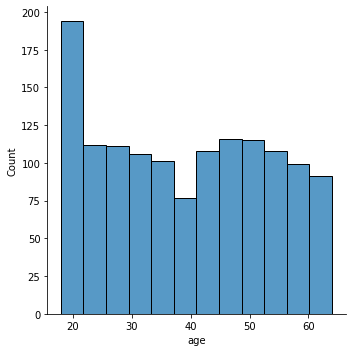

In [52]:
# distribution of age value
sns.displot(df['age'])

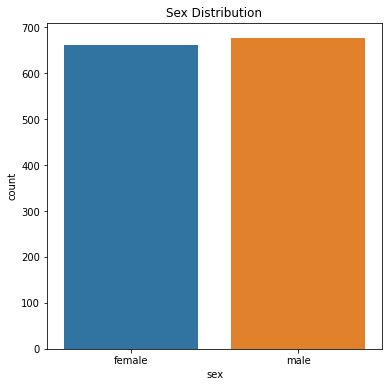

In [53]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

In [54]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

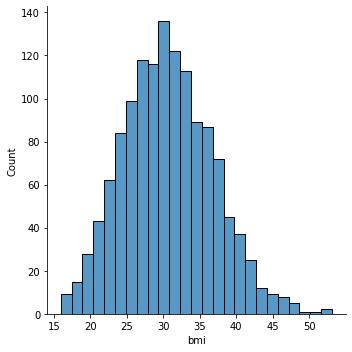

In [55]:
# bmi distribution
sns.displot(df['bmi'])

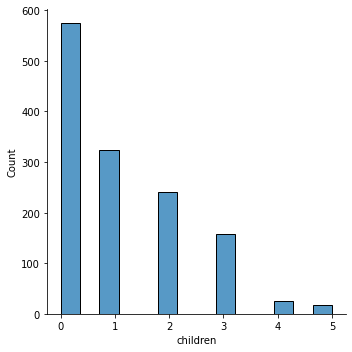

In [56]:
# children column
sns.displot(df['children'])

In [57]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

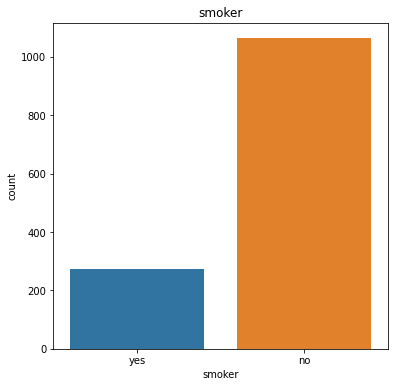

In [58]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

In [59]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

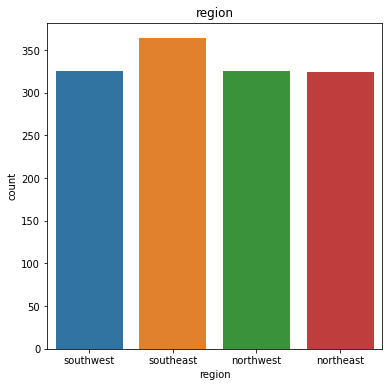

In [60]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

In [61]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

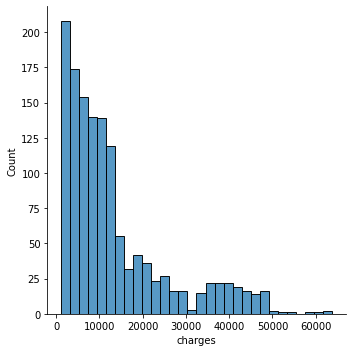

In [62]:
# distribution of charges value
sns.displot(df['charges'])

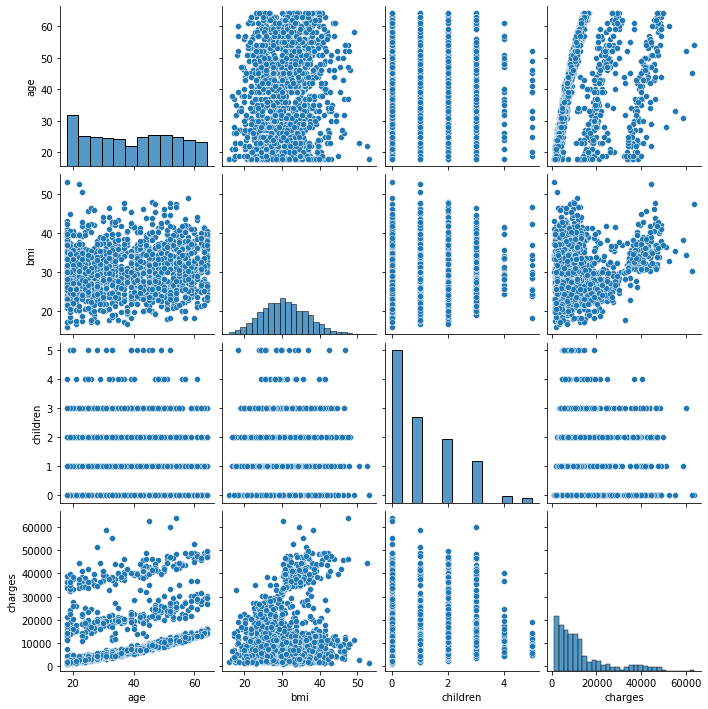

In [63]:
#Visualize the relation between two variables
sns.pairplot(df)

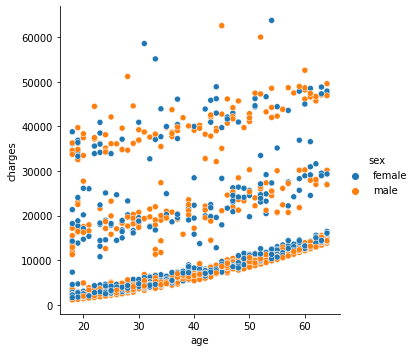

In [64]:
sns.relplot(x='age', y='charges', hue = 'sex', data =df)

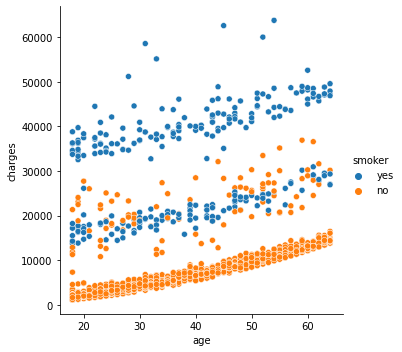

In [65]:
sns.relplot(x='age', y='charges', hue = 'smoker', data =df)

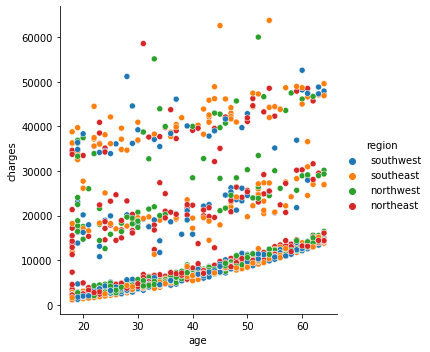

In [66]:
sns.relplot(x='age', y='charges', hue = 'region', data =df)

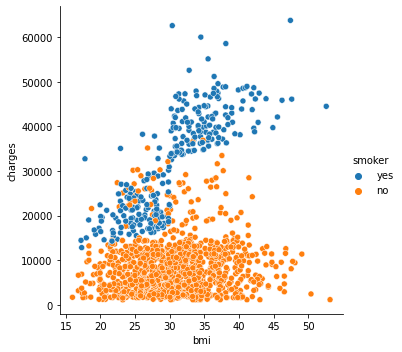

In [67]:
sns.relplot(x='bmi', y='charges', hue = 'smoker', data =df)

*Normal BMI Range is 18.5 to 24.9*

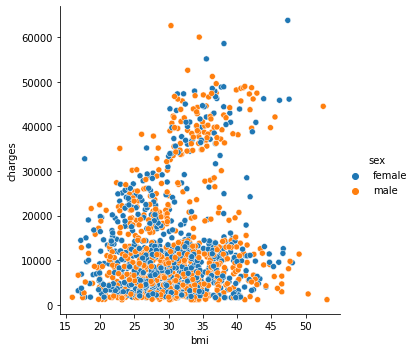

In [68]:
sns.relplot(x='bmi', y='charges', hue = 'sex', data =df)

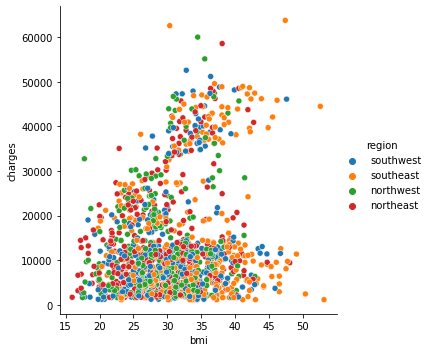

In [69]:
sns.relplot(x='bmi', y='charges', hue = 'region', data =df)

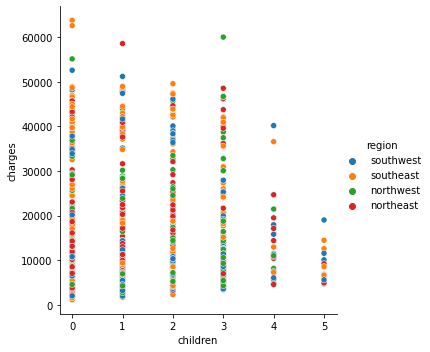

In [70]:
sns.relplot(x='children', y='charges', hue = 'region', data =df)

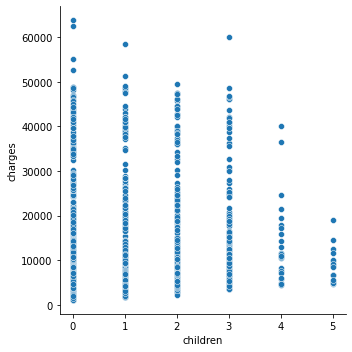

In [71]:
sns.relplot(x='children', y='charges', data =df)

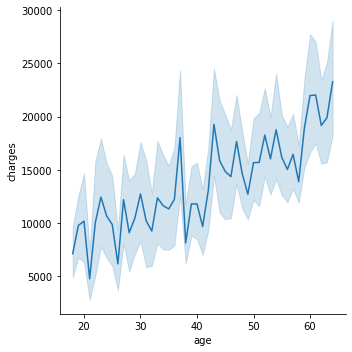

In [72]:
sns.relplot(x='age', y='charges', data =df, kind="line")

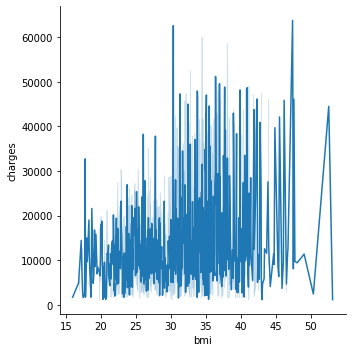

In [73]:
sns.relplot(x='bmi', y='charges', data =df, kind="line")

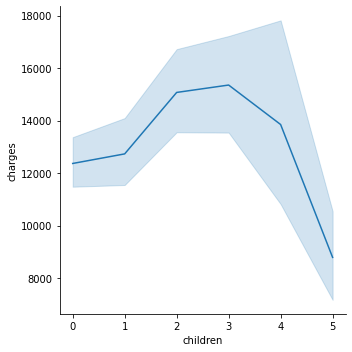

In [74]:
sns.relplot(x='children', y='charges', data =df, kind="line")

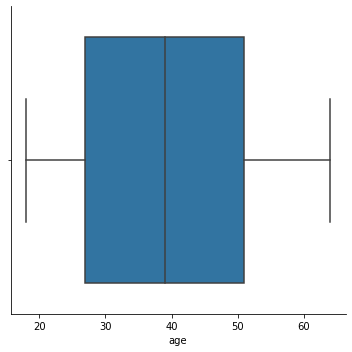

In [75]:
sns.catplot(x ="age", kind="box", data= df)

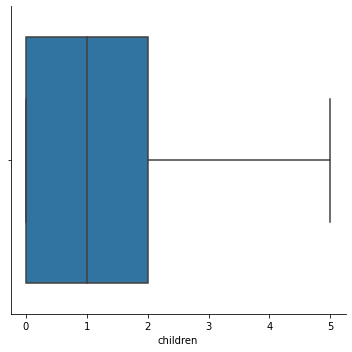

In [77]:
sns.catplot(x ="children", kind="box", data= df)

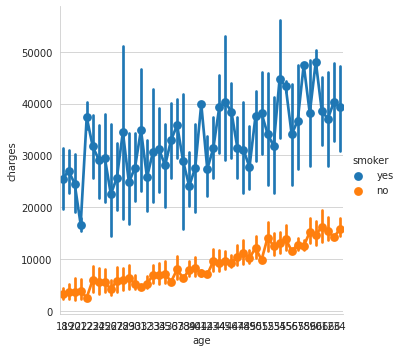

In [ ]:
sns.set_style("whitegrid")
sns.catplot(x="age",y="charges",data=df,hue="smoker",kind="point")

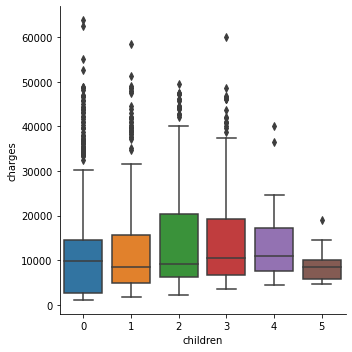

In [78]:
sns.catplot(x="children",y="charges",data=df,kind="box")

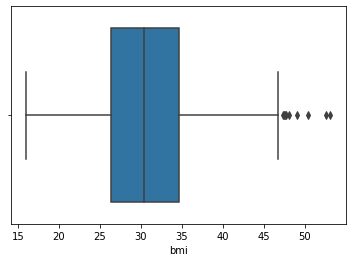

In [79]:
sns.boxplot(x='bmi',data=df)

### Data Pre-Processing - encoding the categorical features

---



In [80]:
# encoding sex column
df.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [81]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


### Splitting the Features and Target

---



In [82]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [83]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


### Splitting the data into Training data & Testing Data

---



In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [85]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training



```
# This is formatted as code
```

### Linear Regression

---



In [86]:
# loading the Linear Regression model
LR = LinearRegression()

In [87]:
LR.fit(X_train, Y_train)

LinearRegression()

### Model Evaluation

---



In [88]:
# prediction on training data
LR_training_data_prediction =LR.predict(X_train)

In [89]:
import math

In [90]:
# R squared value
score_1 = metrics.r2_score(Y_train, LR_training_data_prediction)
#Mean_absolute_error
score_2 = metrics.mean_absolute_error(Y_train, LR_training_data_prediction)
#Mean_squared_error
score_3 = metrics.mean_squared_error(Y_train, LR_training_data_prediction)
print('R squared : ', score_1)
print('Mean Absolute Error : ', score_2)
print('Mean Squared Error : ', score_3)
print('Root Mean Squared Error : ', math.sqrt(score_3))

R squared :  0.751505643411174
Mean Absolute Error :  4150.500304883776
Mean Squared Error :  36174978.427092075
Root Mean Squared Error :  6014.563860089282


In [91]:
# prediction on test data
LR_test_data_prediction =LR.predict(X_test)
# R squared value
score_1 = metrics.r2_score(Y_test, LR_test_data_prediction)
#Mean_absolute_error
score_2 = metrics.mean_absolute_error(Y_test, LR_test_data_prediction)
#Mean_squared_error
score_3 = metrics.mean_squared_error(Y_test, LR_test_data_prediction)
print('R squared : ', score_1)
print('Mean Absolute Error : ', score_2)
print('Mean Squared Error : ', score_3)
print('Root Mean Squared Error : ', math.sqrt(score_3))

R squared :  0.7447273869684077
Mean Absolute Error :  4267.213826730731
Mean Squared Error :  38337035.48643883
Root Mean Squared Error :  6191.690842285234


XGBoost Regressor

---



In [92]:
from xgboost import XGBRegressor

In [93]:
# loading the model
XGBR = XGBRegressor()

In [94]:
# training the model with X_train
XGBR.fit(X_train, Y_train)

[18:46:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

### Prediction on training data

---



In [95]:
# accuracy for prediction on training data
XGBR_training_data_prediction = XGBR.predict(X_train)

In [96]:
# R squared value
score_1 = metrics.r2_score(Y_train, XGBR_training_data_prediction)
#Mean_absolute_error
score_2 = metrics.mean_absolute_error(Y_train, XGBR_training_data_prediction)
#Mean_squared_error
score_3 = metrics.mean_squared_error(Y_train, XGBR_training_data_prediction)
print('R squared : ', score_1)
print('Mean Absolute Error : ', score_2)
print('Mean Squared Error : ', score_3)
print('Root Mean Squared Error : ', math.sqrt(score_3))

R squared :  0.8990140961276583
Mean Absolute Error :  2088.3858191262557
Mean Squared Error :  14701190.579016255
Root Mean Squared Error :  3834.213162960069


### Prediction on testing data

---



In [97]:
# accuracy for prediction on test data
XGBR_test_data_prediction = XGBR.predict(X_test)

In [98]:
# R squared value
score_1 = metrics.r2_score(Y_test, XGBR_test_data_prediction)
#Mean_absolute_error
score_2 = metrics.mean_absolute_error(Y_test, XGBR_test_data_prediction)
#Mean_squared_error
score_3 = metrics.mean_squared_error(Y_test, XGBR_test_data_prediction)
print('R squared : ', score_1)
print('Mean Absolute Error : ', score_2)
print('Mean Squared Error : ', score_3)
print('Root Mean Squared Error : ', math.sqrt(score_3))

R squared :  0.868116552532486
Mean Absolute Error :  2381.567011585092
Mean Squared Error :  19806356.606731832
Root Mean Squared Error :  4450.433305503166


### Lasso Regression

---



In [99]:
from sklearn.linear_model import Lasso

In [100]:
# loading the lasso regression model
LASSO = Lasso()

In [101]:
LASSO.fit(X_train,Y_train)

Lasso()

### Prediction on training data

---



In [102]:
# prediction on Training data
LASSO_training_data_prediction = LASSO.predict(X_train)

In [103]:
# R squared value
score_1 = metrics.r2_score(Y_train, LASSO_training_data_prediction)
#Mean_absolute_error
score_2 = metrics.mean_absolute_error(Y_train, LASSO_training_data_prediction)
#Mean_squared_error
score_3 = metrics.mean_squared_error(Y_train, LASSO_training_data_prediction)
print('R squared : ', score_1)
print('Mean Absolute Error : ', score_2)
print('Mean Squared Error : ', score_3)
print('Root Mean Squared Error : ', math.sqrt(score_3))

R squared :  0.7515055550686265
Mean Absolute Error :  4150.971205226314
Mean Squared Error :  36174991.287705064
Root Mean Squared Error :  6014.564929211843


### Prediction on testing data

---



In [114]:
# prediction on Testing data
LASSO_test_data_prediction = LASSO.predict(X_test)

In [115]:
# R squared value
score_1 = metrics.r2_score(Y_test, LASSO_test_data_prediction)
#Mean_absolute_error
score_2 = metrics.mean_absolute_error(Y_test, LASSO_test_data_prediction)
#Mean_squared_error
score_3 = metrics.mean_squared_error(Y_test, LASSO_test_data_prediction)
print('R squared : ', score_1)
print('Mean Absolute Error : ', score_2)
print('Mean Squared Error : ', score_3)
print('Root Mean Squared Error : ', math.sqrt(score_3))

R squared :  0.7447245444913575
Mean Absolute Error :  4267.164610260891
Mean Squared Error :  38337462.37180757
Root Mean Squared Error :  6191.725314628191


### Random Forest Regresson

---



In [116]:
from sklearn.ensemble import RandomForestRegressor

In [117]:
RFR = RandomForestRegressor(n_estimators=100)

In [118]:
# training the model
RFR.fit(X_train,Y_train)

RandomForestRegressor()

### Prediction on training data

---



In [119]:
# prediction on Train Data
RFR_training_data_prediction = RFR.predict(X_train)

In [120]:
# R squared value
score_1 = metrics.r2_score(Y_train, RFR_training_data_prediction)
#Mean_absolute_error
score_2 = metrics.mean_absolute_error(Y_train, RFR_training_data_prediction)
#Mean_squared_error
score_3 = metrics.mean_squared_error(Y_train, RFR_training_data_prediction)
print('R squared : ', score_1)
print('Mean Absolute Error : ', score_2)
print('Mean Squared Error : ', score_3)
print('Root Mean Squared Error : ', math.sqrt(score_3))

R squared :  0.9755628547354201
Mean Absolute Error :  1007.2725658262057
Mean Squared Error :  3557477.984212878
Root Mean Squared Error :  1886.127775155458


### Prediction on testing data

---



In [121]:
# prediction on Test Data
RFR_test_data_prediction = RFR.predict(X_test)

In [122]:
# R squared value
score_1 = metrics.r2_score(Y_test, RFR_test_data_prediction)
#Mean_absolute_error
score_2 = metrics.mean_absolute_error(Y_test, RFR_test_data_prediction)
#Mean_squared_error
score_3 = metrics.mean_squared_error(Y_test, RFR_test_data_prediction)
print('R squared : ', score_1)
print('Mean Absolute Error : ', score_2)
print('Mean Squared Error : ', score_3)
print('Root Mean Squared Error : ', math.sqrt(score_3))

R squared :  0.8407599946625153
Mean Absolute Error :  2695.4872704652616
Mean Squared Error :  23914785.30729944
Root Mean Squared Error :  4890.274563590417


#Ridge Regression

---



In [123]:
from sklearn.linear_model import Ridge

In [124]:
RR = Ridge(alpha=1)

In [125]:
# training the model
RR.fit(X_train,Y_train)

Ridge(alpha=1)

### Prediction on training data

---



In [126]:
# prediction on Train Data
RR_training_data_prediction = RR.predict(X_train)

In [127]:
# R squared value
score_1 = metrics.r2_score(Y_train, RR_training_data_prediction)
#Mean_absolute_error
score_2 = metrics.mean_absolute_error(Y_train, RR_training_data_prediction)
#Mean_squared_error
score_3 = metrics.mean_squared_error(Y_train, RR_training_data_prediction)
print('R squared : ', score_1)
print('Mean Absolute Error : ', score_2)
print('Mean Squared Error : ', score_3)
print('Root Mean Squared Error : ', math.sqrt(score_3))

R squared :  0.7514846144151406
Mean Absolute Error :  4161.626155575833
Mean Squared Error :  36178039.758094884
Root Mean Squared Error :  6014.818347888396


### Prediction on testing data

---



In [128]:
# prediction on Test Data
RR_test_data_prediction = RR.predict(X_test)

In [129]:
# R squared value
score_1 = metrics.r2_score(Y_test, RR_test_data_prediction)
#Mean_absolute_error
score_2 = metrics.mean_absolute_error(Y_test, RR_test_data_prediction)
#Mean_squared_error
score_3 = metrics.mean_squared_error(Y_test, RR_test_data_prediction)
print('R squared : ', score_1)
print('Mean Absolute Error : ', score_2)
print('Mean Squared Error : ', score_3)
print('Root Mean Squared Error : ', math.sqrt(score_3))

R squared :  0.7448008334274916
Mean Absolute Error :  4273.45404124713
Mean Squared Error :  38326005.24126363
Root Mean Squared Error :  6190.80004856106


### Decision Tree Regresson

---



In [130]:
from sklearn.tree import DecisionTreeRegressor

In [131]:
DTR = DecisionTreeRegressor()

In [132]:
# training the model
DTR.fit(X_train,Y_train)

DecisionTreeRegressor()

### Prediction on training data

---



In [133]:
# prediction on Train Data
DTR_training_data_prediction = DTR.predict(X_train)

In [134]:
# R squared value
score_1 = metrics.r2_score(Y_train, DTR_training_data_prediction)
#Mean_absolute_error
score_2 = metrics.mean_absolute_error(Y_train, DTR_training_data_prediction)
#Mean_squared_error
score_3 = metrics.mean_squared_error(Y_train, DTR_training_data_prediction)
print('R squared : ', score_1)
print('Mean Absolute Error : ', score_2)
print('Mean Squared Error : ', score_3)
print('Root Mean Squared Error : ', math.sqrt(score_3))

R squared :  1.0
Mean Absolute Error :  0.0
Mean Squared Error :  0.0
Root Mean Squared Error :  0.0


### Prediction on testing data

---



In [136]:
# prediction on Test Data
DTR_test_data_prediction = DTR.predict(X_test)

In [137]:
# R squared value
score_1 = metrics.r2_score(Y_test, DTR_test_data_prediction)
#Mean_absolute_error
score_2 = metrics.mean_absolute_error(Y_test, DTR_test_data_prediction)
#Mean_squared_error
score_3 = metrics.mean_squared_error(Y_test, DTR_test_data_prediction)
print('R squared : ', score_1)
print('Mean Absolute Error : ', score_2)
print('Mean Squared Error : ', score_3)
print('Root Mean Squared Error : ', math.sqrt(score_3))

R squared :  0.7008530704009537
Mean Absolute Error :  3344.1681118208953
Mean Squared Error :  44926113.771078676
Root Mean Squared Error :  6702.694515721172


### KNN Model

---



In [138]:
from sklearn import neighbors

In [139]:
KNN = neighbors.KNeighborsRegressor()

In [140]:
# training the model
KNN.fit(X_train,Y_train)

KNeighborsRegressor()

### Prediction on training data

---



In [141]:
# prediction on Train Data
KNN_training_data_prediction = KNN.predict(X_train)

In [142]:
# R squared value
score_1 = metrics.r2_score(Y_train, KNN_training_data_prediction)
#Mean_absolute_error
score_2 = metrics.mean_absolute_error(Y_train, KNN_training_data_prediction)
#Mean_squared_error
score_3 = metrics.mean_squared_error(Y_train, KNN_training_data_prediction)
print('R squared : ', score_1)
print('Mean Absolute Error : ', score_2)
print('Mean Squared Error : ', score_3)
print('Root Mean Squared Error : ', math.sqrt(score_3))

R squared :  0.3981185324260824
Mean Absolute Error :  6402.47759598972
Mean Squared Error :  87619893.68305859
Root Mean Squared Error :  9360.549860080795


### Prediction on testing data

---



In [143]:
# prediction on Test Data
KNN_test_data_prediction = KNN.predict(X_test)

In [144]:
# R squared value
score_1 = metrics.r2_score(Y_test, KNN_test_data_prediction)
#Mean_absolute_error
score_2 = metrics.mean_absolute_error(Y_test, KNN_test_data_prediction)
#Mean_squared_error
score_3 = metrics.mean_squared_error(Y_test, KNN_test_data_prediction)
print('R squared : ', score_1)
print('Mean Absolute Error : ', score_2)
print('Mean Squared Error : ', score_3)
print('Root Mean Squared Error : ', math.sqrt(score_3))

R squared :  0.039413951977658956
Mean Absolute Error :  8592.545605237314
Mean Squared Error :  144261544.44641882
Root Mean Squared Error :  12010.89274144178


### Support Vector Regression

---



In [145]:
from sklearn.svm import SVR

In [146]:
SVR = SVR(kernel="linear")

In [147]:
SVR.fit(X_train,Y_train)

SVR(kernel='linear')

### Prediction on training data

---



In [148]:
# prediction on Train Data
SVR_training_data_prediction = SVR.predict(X_train)

In [149]:
# R squared value
score_1 = metrics.r2_score(Y_train, SVR_training_data_prediction)
#Mean_absolute_error
score_2 = metrics.mean_absolute_error(Y_train, SVR_training_data_prediction)
#Mean_squared_error
score_3 = metrics.mean_squared_error(Y_train, SVR_training_data_prediction)
print('R squared : ', score_1)
print('Mean Absolute Error : ', score_2)
print('Mean Squared Error : ', score_3)
print('Root Mean Squared Error : ', math.sqrt(score_3))

R squared :  -0.1466513853398994
Mean Absolute Error :  6609.749748087173
Mean Squared Error :  166925678.70545888
Root Mean Squared Error :  12919.972086094416


### Prediction on testing data

---



In [150]:
# prediction on Test Data
SVR_test_data_prediction = SVR.predict(X_test)

In [151]:
# R squared value
score_1 = metrics.r2_score(Y_test, SVR_test_data_prediction)
#Mean_absolute_error
score_2 = metrics.mean_absolute_error(Y_test, SVR_test_data_prediction)
#Mean_squared_error
score_3 = metrics.mean_squared_error(Y_test, SVR_test_data_prediction)
print('R squared : ', score_1)
print('Mean Absolute Error : ', score_2)
print('Mean Squared Error : ', score_3)
print('Root Mean Squared Error : ', math.sqrt(score_3))

R squared :  -0.09975846691765988
Mean Absolute Error :  6401.642760595211
Mean Squared Error :  165162564.3347648
Root Mean Squared Error :  12851.558828981208


### Gradient Boosting Regressor 

---



In [105]:
from sklearn.ensemble import GradientBoostingRegressor

In [106]:
GBR = GradientBoostingRegressor()
GBR.fit(X_train,Y_train)

GradientBoostingRegressor()

### Prediction on training data

---



In [107]:
# prediction on Train Data
GBR_training_data_prediction = GBR.predict(X_train)

In [108]:
# R squared value
score_1 = metrics.r2_score(Y_train, GBR_training_data_prediction)
#Mean_absolute_error
score_2 = metrics.mean_absolute_error(Y_train, GBR_training_data_prediction)
#Mean_squared_error
score_3 = metrics.mean_squared_error(Y_train, GBR_training_data_prediction)
print('R squared : ', score_1)
print('Mean Absolute Error : ', score_2)
print('Mean Squared Error : ', score_3)
print('Root Mean Squared Error : ', math.sqrt(score_3))

R squared :  0.9054241915138913
Mean Absolute Error :  2029.4542648619797
Mean Squared Error :  13768030.303283017
Root Mean Squared Error :  3710.52965266187


### Prediction on testing data

---



In [109]:
# prediction on Test Data
GBR_test_data_prediction = GBR.predict(X_test)

In [110]:
# R squared value
score_1 = metrics.r2_score(Y_test, GBR_test_data_prediction)
#Mean_absolute_error
score_2 = metrics.mean_absolute_error(Y_test, GBR_test_data_prediction)
#Mean_squared_error
score_3 = metrics.mean_squared_error(Y_test, GBR_test_data_prediction)
print('R squared : ', score_1)
print('Mean Absolute Error : ', score_2)
print('Mean Squared Error : ', score_3)
print('Root Mean Squared Error : ', math.sqrt(score_3))

R squared :  0.8683667744795172
Mean Absolute Error :  2372.1475499797425
Mean Squared Error :  19768778.084112827
Root Mean Squared Error :  4446.209406237275


### Prediction on Training Data

---



In [152]:
y_pred1 = LR.predict(X_train)
y_pred2 = XGBR.predict(X_train)
y_pred3 = LASSO.predict(X_train)
y_pred4 = RFR.predict(X_train)
y_pred5 = RR.predict(X_train)
y_pred6 = DTR.predict(X_train)
y_pred7 = KNN.predict(X_train)
y_pred8 = SVR.predict(X_train)
y_pred9 = GBR.predict(X_train)

Prediction = pd.DataFrame({'Actual':Y_train,'LR':y_pred1,
                  'XGBR':y_pred2,'LASSO':y_pred3,'RFR':y_pred4,'RR':y_pred5,'DTR':y_pred6,'KNN':y_pred7,'SVR':y_pred8,'GBR':y_pred9})

In [ ]:
Prediction

,Actual,LR,XGBR,LASSO,RFR,RR,DTR,KNN,SVR,GBR
882,2585.85065,478.494042,3290.222168,478.707372,2561.346301,504.302090,2585.85065,11111.189436,2211.636428,2993.697186
505,6796.86325,9317.753697,7649.439453,9318.493451,6701.802532,9345.983389,6796.86325,6807.444820,7267.012369,7763.968333
798,11848.14100,13193.798591,12293.765625,13193.752342,12213.139862,13216.973938,11848.14100,12295.298980,12021.977527,12342.560110
792,2731.91220,1075.424622,3415.835693,1075.524054,2656.207945,1100.967612,2731.91220,5044.686450,2482.983162,3559.338426
201,8871.15170,10760.136984,10280.180664,10760.579718,8936.264333,10787.230522,8871.15170,14948.010060,9561.182748,10390.773408
...,...,...,...,...,...,...,...,...,...,...
466,13224.69300,12822.039183,14935.989258,12821.806749,14641.438078,12845.881702,13224.69300,16378.135012,12782.951284,14521.077026
299,9249.49520,10289.138921,10439.311523,10286.894516,9870.649324,10308.740452,9249.49520,9212.644250,9728.457657,10368.720972
493,12574.04900,17327.554425,13326.908203,17330.863797,13097.223609,17356.385857,12574.04900,27337.425740,12806.440059,13280.581511
527,9861.02500,9600.518608,10449.152344,9600.620741,11374.568361,9625.690851,9861.02500,9225.237250,10380.047985,10515.660382


### Prediction on Test Data

---



In [ ]:
y_pred1 = LR.predict(X_test)
y_pred2 = XGBR.predict(X_test)
y_pred3 = LASSO.predict(X_test)
y_pred4 = RFR.predict(X_test)
y_pred5 = RR.predict(X_test)
y_pred6 = DTR.predict(X_test)
y_pred7 = KNN.predict(X_test)
y_pred8 = SVR.predict(X_test)
y_pred9 = GBR.predict(X_test)

Prediction = pd.DataFrame({'Actual':Y_test,'LR':y_pred1,
                  'XGBR':y_pred2,'LASSO':y_pred3,'RFR':y_pred4,'RR':y_pred5,'DTR':y_pred6,'KNN':y_pred7,'SVR':y_pred8,'GBR':y_pred9})

In [ ]:
Prediction

,Actual,LR,XGBR,LASSO,RFR,RR,DTR,KNN,SVR,GBR
17,2395.17155,1520.592422,3682.104980,1525.076187,5061.939270,1553.546212,2396.09590,2494.841260,2679.264967,3997.205442
1091,11286.53870,11570.592018,12003.783203,11569.887545,11138.591220,11591.905873,10214.63600,19889.854392,11269.613893,12159.050017
273,9617.66245,10082.438499,11102.420898,10085.811565,13804.821848,10112.373179,9447.38240,15737.033822,10114.695467,11134.165033
270,1719.43630,2246.217543,3382.389404,2251.510852,2356.372209,2284.252912,1720.35370,7914.847760,1519.767094,3009.267748
874,8891.13950,7881.283620,9574.531250,7883.974857,9477.454236,7912.988562,8302.53565,11042.951650,9005.438544,10056.388319
...,...,...,...,...,...,...,...,...,...,...
232,1727.78500,-1669.890650,6960.750000,-1668.196964,1789.238492,-1640.509531,1728.89700,2069.044410,1592.917857,7351.687771
323,11566.30055,15722.419522,13581.205078,15724.987126,16109.417143,15749.352632,20709.02034,12797.788308,11793.943249,13566.571354
1337,29141.36030,36968.055645,28140.138672,36959.769810,28555.322400,36848.584303,28868.66390,19685.770672,13136.802329,28319.448971
1066,8978.18510,12987.364848,10089.932617,12991.081033,9651.963135,13021.395222,9800.88820,29566.661640,9776.321631,10065.341206


### Compare Performance Visually

---



In [ ]:
import matplotlib.pyplot as plt

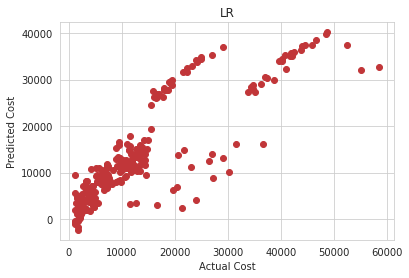

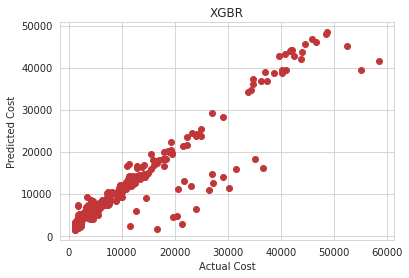

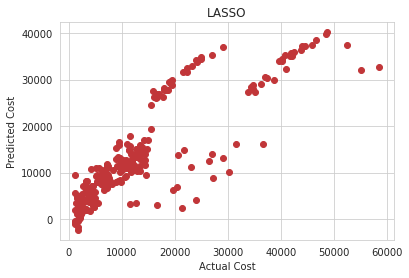

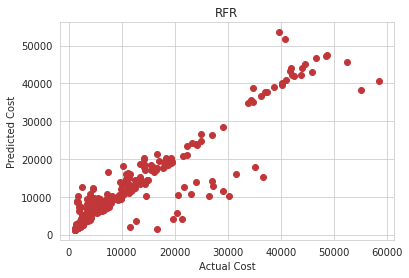

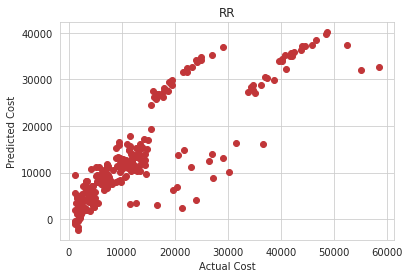

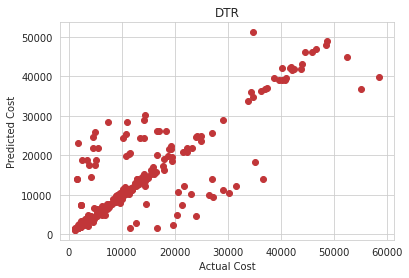

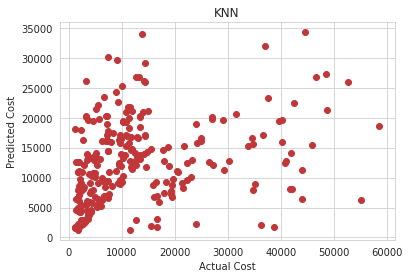

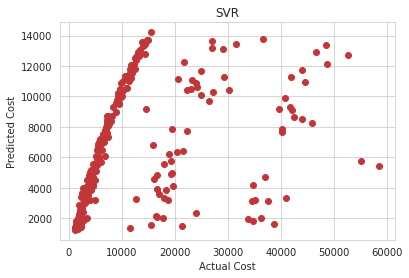

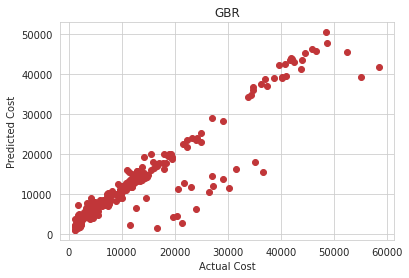

In [ ]:
sns.set_palette("RdBu")
plt.scatter(Y_test, LR_test_data_prediction)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("LR")
plt.show()
plt.scatter(Y_test, XGBR_test_data_prediction)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("XGBR")
plt.show()
plt.scatter(Y_test, LASSO_test_data_prediction)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("LASSO")
plt.show()
plt.scatter(Y_test, RFR_test_data_prediction)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("RFR")
plt.show()
plt.scatter(Y_test, RR_test_data_prediction)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("RR")
plt.show()
plt.scatter(Y_test, DTR_test_data_prediction)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("DTR")
plt.show()
plt.scatter(Y_test, KNN_test_data_prediction)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("KNN")
plt.show()
plt.scatter(Y_test, SVR_test_data_prediction)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("SVR")
plt.show()
plt.scatter(Y_test, GBR_test_data_prediction)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("GBR")
plt.show()

### Building a Predictive System

---



In [153]:
age = input("Enter your age: ")
sex = input("Enter 0 for male and 1 for Female: ")
bmi = input("Enter your BMI rate: ")
child = input("Number of your children: ")
smoke = input("Enter 0 for smoker and 1 for non smoker: ")
region = input("Enter 0 for southeast, 1 for southwest, 2 for northeast, and 3 for northwest: ")
input_data = (age,sex,bmi,child,smoke,region)
# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array\
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

a = LR.predict(input_data_reshaped)
b = RR.predict(input_data_reshaped)
c = LASSO.predict(input_data_reshaped)
d = RFR.predict(input_data_reshaped)
e = DTR.predict(input_data_reshaped)
f = KNN.predict(input_data_reshaped)
g = SVR.predict(input_data_reshaped)
h = GBR.predict(input_data_reshaped)


print('Using LR the insurance cost is USD ', a[0])
print('Using RR insurance cost is USD ', b[0])
print('Using LASSO insurance cost is USD ', c[0])
print('Using RFR insurance cost is USD ', d[0])
print('Using DTR the insurance cost is USD ', e[0])
print('Using KNN insurance cost is USD ', f[0])
print('Using SVR insurance cost is USD ', g[0])
print('Using GBR insurance cost is USD ', h[0])

#print('The insurance cost is USD ', prediction[0])

Enter your age: 23
Enter 0 for male and 1 for Female: 0
Enter your BMI rate: 44
Number of your children: 0
Enter 0 for smoker and 1 for non smoker: 1
Enter 0 for southeast, 1 for southwest, 2 for northeast, and 3 for northwest: 0
Using LR the insurance cost is USD  7760.325186004098
Using RR insurance cost is USD  7795.364853406503
Using LASSO insurance cost is USD  7764.6979587834685
Using RFR insurance cost is USD  2878.9743657999998
Using DTR the insurance cost is USD  1837.2819
Using KNN insurance cost is USD  13633.161376
Using SVR insurance cost is USD  2675.794415014861
Using GBR insurance cost is USD  2504.4141418814215


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your

prediction = GBR.predict(input_data_reshaped)

for i in range(len(Predict)):
    prediction = Predict[0].predict(input_data_reshaped)
    print('The insurance cost is USD ', prediction[0])